Epoch 10/100 - Mean Squared Error: 0.0540 - Accuracy: 0.00%
Epoch 20/100 - Mean Squared Error: 0.0427 - Accuracy: 0.00%
Epoch 30/100 - Mean Squared Error: 0.0337 - Accuracy: 0.00%
Epoch 40/100 - Mean Squared Error: 0.0266 - Accuracy: 0.00%
Epoch 50/100 - Mean Squared Error: 0.0212 - Accuracy: 0.00%
Epoch 60/100 - Mean Squared Error: 0.0169 - Accuracy: 0.00%
Epoch 70/100 - Mean Squared Error: 0.0136 - Accuracy: 0.00%
Epoch 80/100 - Mean Squared Error: 0.0110 - Accuracy: 0.00%
Epoch 90/100 - Mean Squared Error: 0.0089 - Accuracy: 0.00%
Epoch 100/100 - Mean Squared Error: 0.0072 - Accuracy: 0.00%


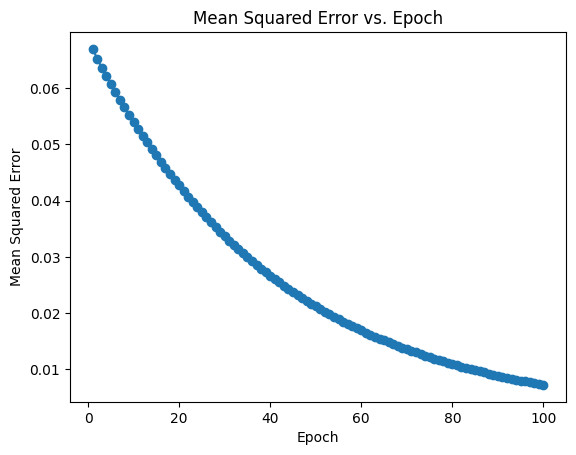

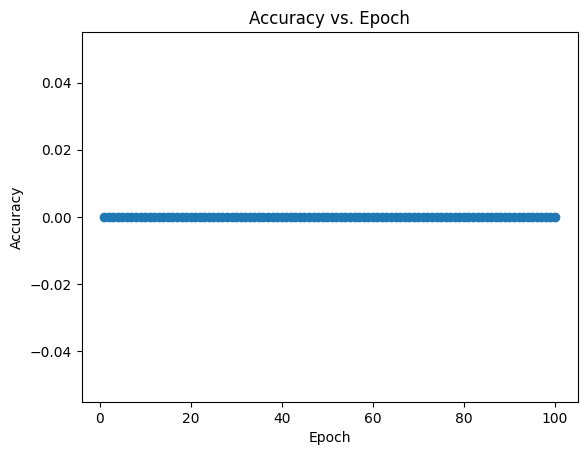

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to initialize random weights and biases
def initialize_parameters(input_size):
    np.random.seed(42)
    weights = np.random.randn(input_size, 1)
    bias = np.random.randn(1)
    return weights, bias

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass through the neural network
def forward(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Calculate squared error loss
def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Update parameters using stochastic gradient descent
def update_parameters(X, y, weights, bias, learning_rate):
    m = X.shape[0]
    
    for i in range(m):
        # Forward pass
        X_i = X[i:i+1]
        y_i = y[i:i+1]
        y_pred = forward(X_i, weights, bias)
        
        # Compute gradients
        error = y_pred - y_i
        delta_weights = np.dot(X_i.T, error)
        delta_bias = np.sum(error)
        
        # Update weights and bias
        weights -= learning_rate * delta_weights
        bias -= learning_rate * delta_bias
    
    return weights, bias

# Generate synthetic dataset
X = np.array([[0.5], [2.5]])
y = np.array([[0.2], [0.9]])

# Initialize parameters
weights, bias = initialize_parameters(X.shape[1])

# Hyperparameters
learning_rate = 0.1
epochs = 100

# Lists to store mean squared error and accuracy for plotting
mse_history = []
accuracy_history = []

# Training loop
for epoch in range(epochs):
    mean_squared_error = 0
    correct_predictions = 0
    
    for i in range(X.shape[0]):
        # Forward pass and calculate loss
        X_i = X[i:i+1]
        y_i = y[i:i+1]
        y_pred = forward(X_i, weights, bias)
        loss = calculate_loss(y_i, y_pred)
        mean_squared_error += loss
        
        # Update parameters
        weights, bias = update_parameters(X_i, y_i, weights, bias, learning_rate)
        
        # Check accuracy
        if np.round(y_pred) == y_i:
            correct_predictions += 1
    
    # Calculate mean squared error and accuracy for the epoch
    mean_squared_error /= X.shape[0]
    accuracy = correct_predictions / X.shape[0]
    
    # Store mean squared error and accuracy for plotting
    mse_history.append(mean_squared_error)
    accuracy_history.append(accuracy)

    # Display updated weights and bias
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs} - Mean Squared Error: {mean_squared_error:.4f} - Accuracy: {accuracy:.2%}")

# Plot mean squared error
plt.plot(range(1, epochs + 1), mse_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epoch')
plt.show()

# Plot accuracy
plt.plot(range(1, epochs + 1), accuracy_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.show()
